Both ways seem to be wrong as the diagonal is not fully white?? 1 = white, 0 = black

In [96]:
import numpy as np
correlations = np.load("./correlations.pkl.npy")
check = np.load("./check.pkl.npy")

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

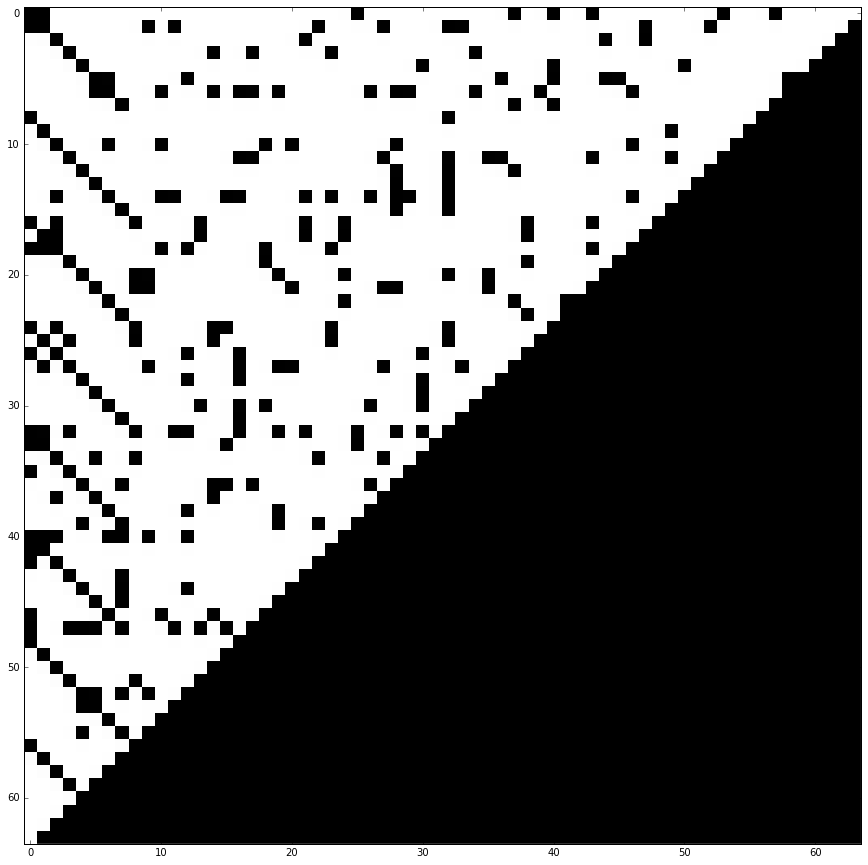

In [98]:
# GPU correlations (symptomatic that the first diagonals (8-blocks) are 0 == black) always
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(correlations, cmap="gray", interpolation="none")

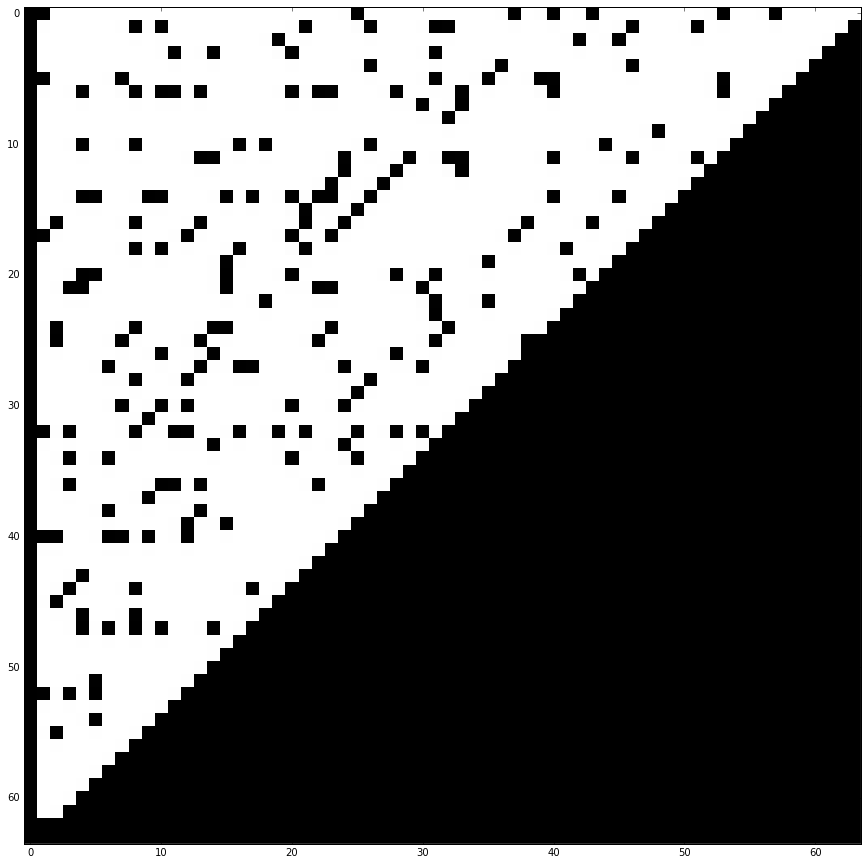

In [99]:
# Ground truth (seems wrong...diagonal not white == 1)
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(check, cmap="gray", interpolation="none")

In [100]:
check.shape

(64, 64)

In [101]:
# let's do it again, recalculate ground truth 
check1 = np.zeros_like(correlations)

In [102]:
N = 64
check1 = np.zeros_like(correlations)
x = np.load("./x.pkl.npy")
y = np.load("./y.pkl.npy")
z = np.load("./z.pkl.npy")
ct = np.load("./ct.pkl.npy")

In [103]:
# INCORRECT? if i put <= the first column will not be black, but white, so that's the changing one
check1 = np.zeros_like(correlations)
for i in range(check1.shape[0]):
        for j in range(i, i + check1.shape[1]):
            if j < check1.shape[0]:
                if (ct[i]-ct[j])**2 < (x[i]-x[j])**2  + (y[i] - y[j])**2 + (z[i] - z[j])**2:
                    check1[i, j-i] = 1

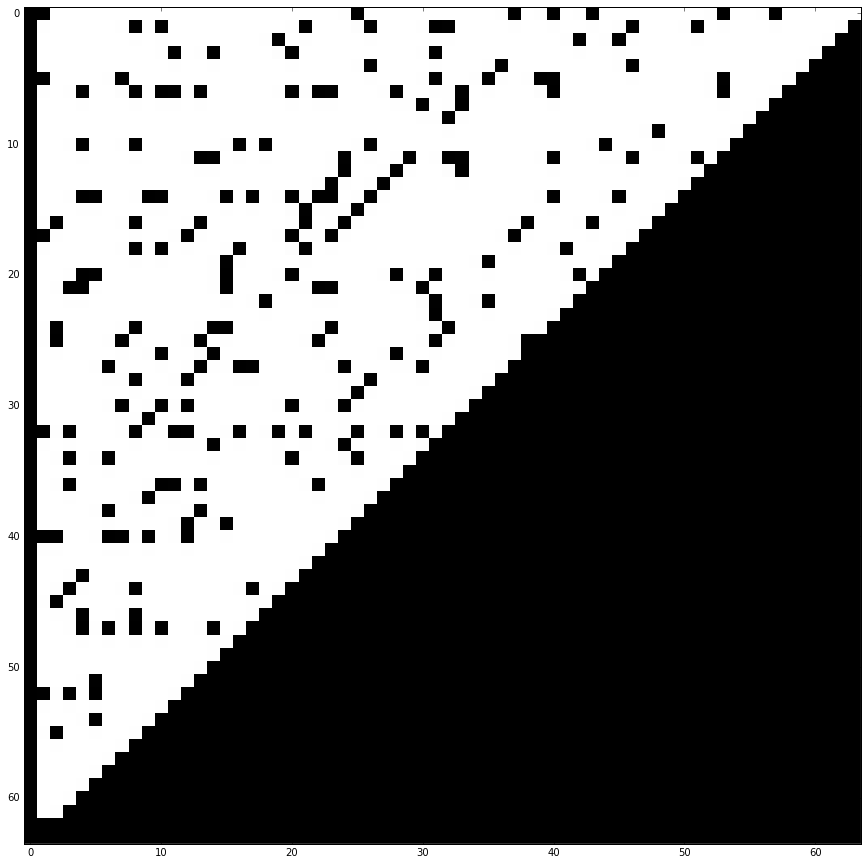

In [104]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(check1, cmap="gray", interpolation="none")

In [105]:
np.abs(check - check1).max()

0

In [106]:
N = 64
hits_method1 = np.identity(N, 'int')

In [107]:
for i in range(hits_method1.shape[0]):
    for j in range(i+1, hits_method1.shape[1]):
        # number_of_pairs_investigated += 1
        if (ct[i]-ct[j])**2 < (x[i]-x[j])**2  + (y[i] - y[j])**2 + (z[i] - z[j])**2:
            # correlated_pairs += 1
            hits_method1[i, j] = 1
            # if hit i is correlated to hit j than also vice versa.

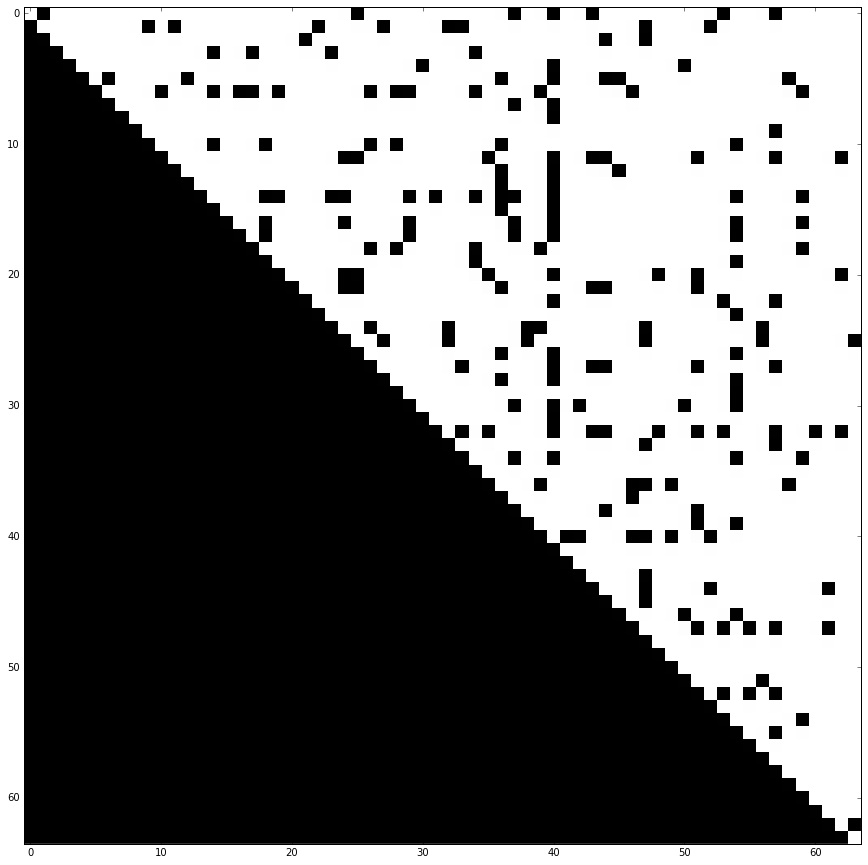

In [108]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(hits_method1, cmap="gray", interpolation="none")

In [111]:
correlations[2,3]

1